In [8]:
import pandas as pd
import numpy as np

In [9]:
data=pd.read_csv('Google_Stock_Price_Train.csv')

In [10]:
prices=data['Open'].values
prices

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_prices=scaler.fit_transform(prices.reshape(-1,1))

In [12]:
train_size=int(len(scaled_prices)*0.8)
train_data=scaled_prices[:train_size]
test_data=scaled_prices[train_size:]

In [13]:
def create_sequences(data, seq_length):
    x=[]
    y=[]
    
    for i in range(len(data)-seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
        
    return np.array(x), np.array(y)


seq_length=60

x_train, y_train=create_sequences(train_data, seq_length)
x_test, y_test=create_sequences(test_data, seq_length)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense

model=tf.keras.Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(seq_length,1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
30/30 [==============================] - 1s 24ms/step - loss: 6.6136e-04
Epoch 2/10
30/30 [==============================] - 1s 23ms/step - loss: 5.4502e-04
Epoch 3/10
30/30 [==============================] - 1s 24ms/step - loss: 5.5120e-04
Epoch 4/10
30/30 [==============================] - 1s 23ms/step - loss: 6.3366e-04
Epoch 5/10
30/30 [==============================] - 1s 22ms/step - loss: 4.4074e-04
Epoch 6/10
30/30 [==============================] - 1s 24ms/step - loss: 5.4637e-04
Epoch 7/10
30/30 [==============================] - 1s 23ms/step - loss: 4.2577e-04
Epoch 8/10
30/30 [==============================] - 1s 24ms/step - loss: 3.9871e-04
Epoch 9/10
30/30 [==============================] - 1s 23ms/step - loss: 5.0147e-04
Epoch 10/10
30/30 [==============================] - 1s 24ms/step - loss: 3.7241e-04


In [29]:
output=model.evaluate(x_test, y_test)

print("Loss: ", output)

6/6 [==============================] - 0s 12ms/step - loss: 3.3499e-04
Loss:  0.00033499483834020793


In [30]:
y_pred=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred)

6/6 [==============================] - 0s 9ms/step


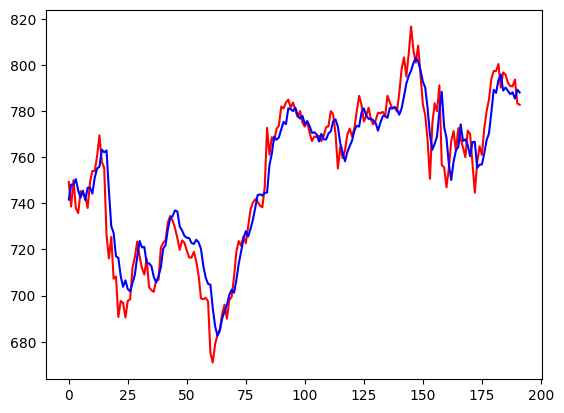

In [31]:
import matplotlib.pyplot as plt

plt.plot(prices[train_size + seq_length:], color='red', label='Actual Price')
plt.plot(y_pred, color='blue', label='Predicted Price')